# Introduction
**What is the context of the work?**


**What research question are you trying to answer?**

How does the economy impact the popularity of movie generes? Hypothesis

**What are your main findings?**



# Assembling Dataset

In [1]:
import sys
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [2]:
url = 'https://www.the-numbers.com/market/genres'
html = requests.get(url).content
soup = BeautifulSoup(html,'lxml')

In [3]:
data = soup.find_all('table')[0].get_text()
newdata = data.split('\n')

for count in range(newdata.count('')):
    newdata.remove('')
    
newdata = newdata[1:]

genres=[]
for index in range(len(newdata)):
    if (index % 6)==1:
        item = newdata[index]
        genres.append(item)

In [4]:
newgenre=genres[:8]
for i in range(len(newgenre)):
    if newgenre[i] == 'Thriller/Suspense': 
        newgenre[i]= 'Thriller-or-Suspense'
    
    if newgenre[i] == 'Romantic Comedy':
        newgenre[i] = 'Romantic-Comedy'
    
    if newgenre[i] == 'Black Comedy':
        newgenre[i] = 'Black-Comedy'

In [61]:
#two dimensional list where dl[index] contains all of the market share datapoints by year for a genre
dl =[]
for genre in newgenre:
    #market share for each genre
    datalist=[]
    url = 'https://www.the-numbers.com/graphs/market/selected-item/genres/genre/gengres/'+genre+'/'+genre+'#_ABSTRACT_RENDERED_ID_0'
    html = requests.get(url).content
    soup = BeautifulSoup(html,'lxml')
    soup.find_all('script')[1].get_text()
    
    text =soup.find_all('script')[1].get_text()
    newtext = text.split(';')
    twotext = newtext[2].split('\t')

    for count in range(twotext.count('')):
        twotext.remove('')

    threetext = twotext[3][1:].split(', ')


    for index in range(len(threetext)):
        data = threetext[index].split(',')
        year=data[0][2:6]
        datapoint=float(data[2][:4])
        datalist.append(datapoint)
    
    dl.append(datalist)

#number of movies produced
dlnummade=[]
for genre in newgenre:
    url='https://www.the-numbers.com/market/genre/'+genre
    html = requests.get(url).content
    soup = BeautifulSoup(html,'lxml')
    p2text = soup.find_all('table')[1].get_text()
    makesomepoints= p2text.split('\n')

    for x in range(makesomepoints.count('')):
        makesomepoints.remove('')

    tabledata = makesomepoints[1:]
    pointsingenre=[]

    for s in range(len(tabledata)):
        if s%8==1:
            pointsingenre.append(tabledata[s])
    dlnummade.append(pointsingenre)

In [219]:
newdata=pd.DataFrame()
#append market share
index = 0
for thegenre in newgenre:
    if len(dl[index])!=26:
        dl[index].insert(0,0)
    if len(dlnummade[index])!=26:
        dlnummade[index].insert(0,0)
    newdata[thegenre + ' Market Share']=dl[index]
    newdata[thegenre + ' Movies Made'] = dlnummade[index]
    index += 1

gdptitle='Change in Annual % Change GDP'
if len(newdata)!=24:
    newdata = newdata.iloc[:-2]
gdp = pd.read_csv("gdp.csv")[(1995-1961):]
gdp.reset_index(inplace=True)
#newdata['GDP % Growth']= gdp[' GDP Growth (%)']
newdata[gdptitle]= gdp[' Annual Change']


#pce = pd.read_csv("pce.csv")
#pcedata=[]
#for index in range(len(pce.loc[0])):
#    pcedata.append(pce.iloc[0][index])
#newdata['PCE'] = pcedata[2:]

inctitle='% Income Annual Change, Chained Dollars'
income = pd.read_csv("income.csv")
incomedata=[]
for index in range(len(income.loc[46])):
    incomedata.append(income.iloc[46][index])
newdata[inctitle] = incomedata[2:]

final_data = newdata.rename(index = lambda s: s + 1995)
final_data

,Adventure Market Share,Adventure Movies Made,Action Market Share,Action Movies Made,Drama Market Share,Drama Movies Made,Comedy Market Share,Comedy Movies Made,Thriller-or-Suspense Market Share,Thriller-or-Suspense Movies Made,Horror Market Share,Horror Movies Made,Romantic-Comedy Market Share,Romantic-Comedy Movies Made,Musical Market Share,Musical Movies Made,Change in Annual % Change GDP,"% Income Annual Change, Chained Dollars"
1995,14.5,28,19.7,29,28.7,131,19.70,61,6.21,20,2.78,15,5.59,16,0.00,0,-1.34,3.3
1996,22.3,33,21.1,36,23.4,121,18.00,70,5.31,23,1.95,9,7.40,19,0.04,2,1.09,3.2
1997,13.8,24,22.9,36,18.8,120,20.40,73,10.10,23,6.41,11,4.67,22,1.79,5,0.67,3.7
1998,23.8,29,14.3,30,23.2,130,11.60,74,11.60,22,4.70,16,7.39,14,0.99,8,0.03,5.9
1999,21.9,27,12.4,34,19.9,158,18.40,79,7.83,17,6.50,16,9.84,28,0.32,11,0.27,3.3
2000,17.6,30,16.8,31,23.2,170,19.60,80,7.59,27,4.91,14,4.97,23,1.23,10,-0.63,5.0
2001,27.1,32,16.6,33,16.4,154,17.60,90,8.07,26,4.68,16,6.33,24,0.83,7,-3.13,2.7
2002,30.7,46,15.2,32,17.4,179,14.20,87,10.30,33,3.25,12,6.27,24,0.63,10,0.74,3.0
2003,26.3,47,22.9,38,12.0,182,19.50,81,4.16,21,4.90,17,5.42,26,1.84,6,1.12,2.7
2004,31.0,48,11.5,28,14.8,231,18.00,121,8.53,29,5.10,22,7.01,33,0.24,5,0.94,3.3


# Data Description

### What are the observations (rows) and the attributes (columns)?

** Observations: ** 

* Adventure Market Share
* Adventure Movies Made
* Action Market Share
* Action Movies Made
* Drama Market Share
* Drama Movies Made
* Action Market Share
* Action Movies Made
* Comedy Market Share
* Comedy Movies Made
* Thriller/Suspense Market Share
* Thriller/Suspense Movies Made
* Horror Market Share
* Horror Movies Made
* Romantic Comedy Market Share
* Romantic Comedy Movies Made
* Musical Market Share
* Musical Movies Made
* Change in % Change Annual GDP
* Change in % Change Annual Income

** Attributes: ** 

* Years 1995-2018


### Why was this dataset created?

This dataset is a combination of data scaping and csv files.

*Movie Data*
* The data scraping comes the Numbers, with the following About Us description: *'The Numbers was officially launched on October 17th, 1997 as a free resource for industry professionals, the investment community, and movie fans to track business information on movies.'*

*Economic Data *
* The information on the economy comes from the U.S. Bureau of Economic Analysis (BEA). The government uses this information to keep track of major economic indicators and figure out how to optimize the economy to increase citizen standard of living.

### Who funded the creation of the dataset?

*Movie Data: * Nash Information Service: a movie industry consulting service

*Economic Data: * The U.S. Government

### What processes might have influenced what data was observed and recorded and what was not?
* Number of ticket sales is recorded by movie theater distributors. This would not take into account whether individuals actually went into the theaters, only that they bought the ticket.
* We are counting views based on ticket sales. However, this does not account for people who illegally streamed the movie, which may be the preferred viewing method during hard economic times.
* Number of movies created is determined by whether the movie makes it to the box office. Therefore, Indie films and small production films will get left out.


### What preprocessing was done, and how did the data come to be in the form that you are using?

* This data is sorted based on genre, which is subjective if a movie falls under different categories.
* Genres that were less than a percent overall were dropped from the data collection to make the dataset more manageable.
* Due to some lack of data past 2018 for some sources, data was cropped to 2018
* I inserted a '0' data point for any genres with less than 26 data points because the source of data only shows data points >0.
* PCE data is recored by using "bundles" and putting weights on each item in the bundle. Therefore, decisions on the bundling and the weight provided would impact what was recorded.

### If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?

There were no surveys, etc. Much of the data was probably collected on a transaction basis, so it is safe to assume that people were not involved.

### Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive​ or ​Cornell Box)​? 

Data Scraping: https://www.the-numbers.com/market/genres

Data Collection: https://www.bea.gov/data/gdp/gross-domestic-product, https://www.bea.gov/data/personal-consumption-expenditures-price-index


# Data Analysis

In [220]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.special import comb
from scipy.stats import spearmanr

## Relationship Between Genres
### Using Histograms to Identify Trends
We can use a linear graph to see if we notice any trends between movies. A linear graph works instead of scatter plot because this data occurs over time. 

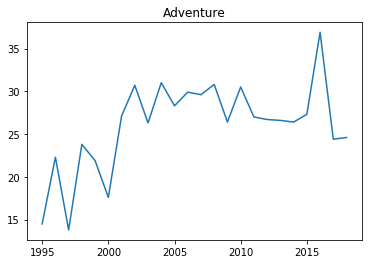

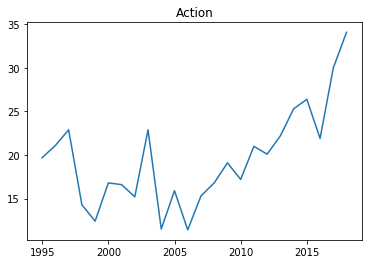

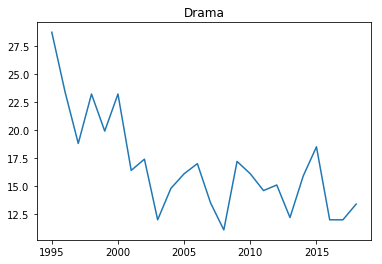

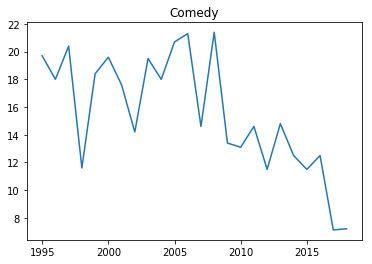

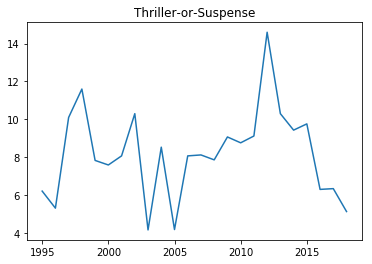

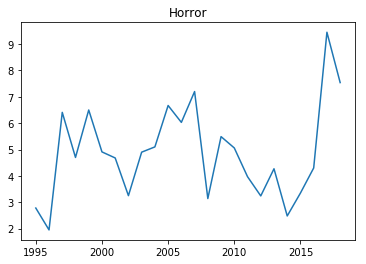

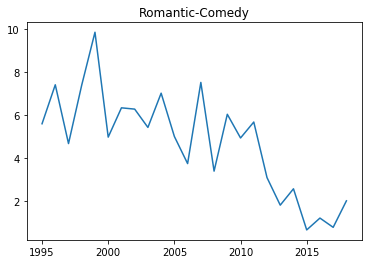

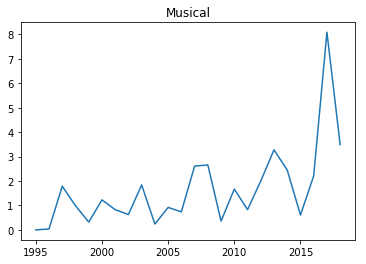

In [221]:
for a in newgenre:
    plt.plot(final_data[a + ' Market Share'])
    plt.title(a)
    plt.show()

** Analysis: ** From this data, we can see that certain genres show similar patterns. 
* Adventure, Action, Horror, and Musicals all show and upward trend with a spike a little after the year of 2015
* Drama, Comedy, and Romantic Comedy show a related decline
* Thrillers do not show any clear trends

### Using Correlation to Find a Clear Relationship
Although visually it appears this way, to figure out the actual relationship, we can compare the correlation of the variables with `Adventure` to determine a positive or negative relationship.

In [222]:
for a in [newgenre[0]]:
    for b in newgenre[1:]:
        if a != b:
            print(a,'and', b)
            model=LinearRegression().fit(final_data[[a+ ' Market Share']],final_data[[b+ ' Market Share']])
            score= model.coef_[0][0]
            print(score)

Adventure and Action
-0.19332460869474544
Adventure and Drama
-0.5670276442433027
Adventure and Comedy
-0.18051033921811938
Adventure and Thriller-or-Suspense
0.010423683744017014
Adventure and Horror
-0.01568427583761746
Adventure and Romantic-Comedy
-0.0967384276880403
Adventure and Musical
0.02535402567337873


** Analysis: ** We can see that adventure only has a correlation with thrillers and musicals overall. A reason for the possible descrepancy between the prediction from the historgrams and the covariance relationships could be that there are shifts in peeks, so while one variable is going up to its peek, another is coming down from its peek, causing a negative correlation.

### Strength of Correlation
We determined which movies genres are positively and negatively correlated, but using covariance to determine the direction of the relationship. However, covariance does not provide us information on the strength of the relationship. To figure this out, we can use the coefficient of determination, or r^2.

In [223]:
strong=[]
scorelist=[]
usedlist=[]
strongr=[]
scorer=[]
usedr=[]
for a in newgenre:
    for b in newgenre:
        model=LinearRegression().fit(final_data[[a+ ' Market Share']],final_data[[b+ ' Market Share']])
        score=model.score(final_data[[a+ ' Market Share']],final_data[[b+ ' Market Share']])
        if score >= .4 and a!=b:
            if a and b not in usedlist:
                usedlist.append(a)
                usedlist.append(b)
                scorelist.append(score)
                strong.append([a,b])
        r = spearmanr(final_data[a+ ' Market Share'],final_data[b+ ' Market Share'])
        spearman_r=r.correlation
        if abs(spearman_r) >= .4 and a!=b:
            if a and b not in usedr:
                usedr.append(a)
                usedr.append(b)
                scorer.append(spearman_r)
                strongr.append([a,b]) 
print('Coefficient of Determination')
for i in range(len(strong)):
    print(strong[i][0], 'and', strong[i][1], ':', scorelist[i])
print()
print('Spearman')
for i in range(len(strongr)):
    print(strongr[i][0], 'and', strongr[i][1], ':', scorer[i])

Coefficient of Determination
Adventure and Drama : 0.46396957223939916
Action and Romantic-Comedy : 0.4694303119762433

Spearman
Adventure and Drama : -0.5081648994095003
Action and Comedy : -0.44971706482031765
Action and Romantic-Comedy : -0.6689865791627363
Action and Musical : 0.466391135681482


** Analysis: ** From this analysis, we can see that drama and adventure have a moderate correlation, and romantic comedy and action have moderate correlation based on the coefficient of determination. Based on rank correlation, we can see that action is also correlated with comedies and musicals. This outcome makes sense based on our previous analysis looking at the histograms.

### Identifying the Relationship Between the Correlated Variables
We have found that Adventure and Drama have a moderate correlation as well as Action and Adventure. To better understand this relationship, we can compare them against each other.

Coefficient of Determination


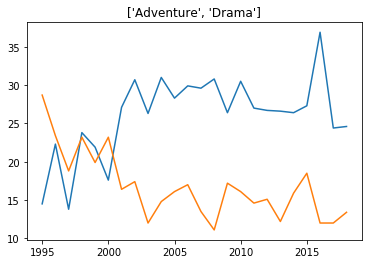

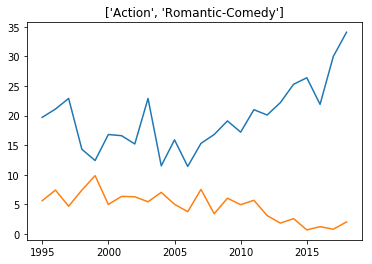

Spearman Correlation


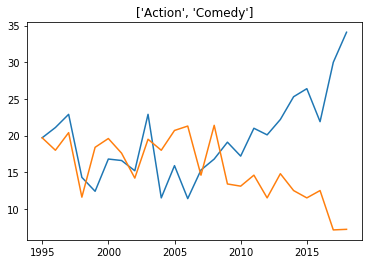

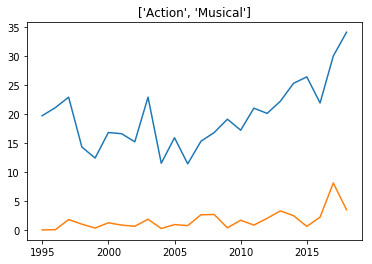

In [224]:
print('Coefficient of Determination')
for i in range(len(strong)):
    plt.title(strong[i])
    plt.plot(final_data[strong[i][0]+ ' Market Share'])
    plt.plot(final_data[strong[i][1]+ ' Market Share'])
    plt.show()

print('Spearman Correlation')
for i in range(len(strongr)):
    if strongr[i] not in strong:
        plt.title(strongr[i])
        plt.plot(final_data[strongr[i][0]+ ' Market Share'])
        plt.plot(final_data[strongr[i][1]+ ' Market Share'])
        plt.show()

** Analysis: ** These histograms confirm our previous analysis. 
* When we look at `Adventure` and `Drama`, the histograms show that there is a negative correlation. Whenever we see a sharp rise in `Drama`, we see `Adventure` fall.
* When we look at `Action` and `Romantic Comedy`, we can see that the negative correlation, r, visually holds. At approximately 1999, both genres have approximately 12% of the market share. However, by 2018, `Action` skyrockets to 35% while `Romantic Comedy` plummets to less than 5%.
* When we look at `Action` and `Comedy`, we can also see a clear negative relationship beginning around 2003. As one increases, the other decreases. Therefore, this negative relationship holds.
* Finally, when we look at `Actions` and `Musicals`, we can see the `Musicals` are not very volatile so it is harder to see a clear correlation. That being said, they both have a general upward trend and hike up around 2016. Therefore, this relationship is likely valid. 

## Relationship Between GDP and Genres
### Scatter Plot of GDP and Movie Market Share

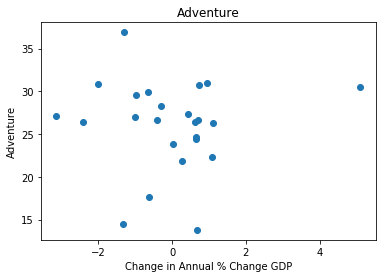

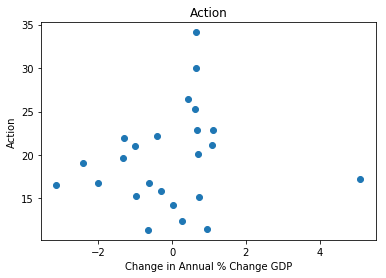

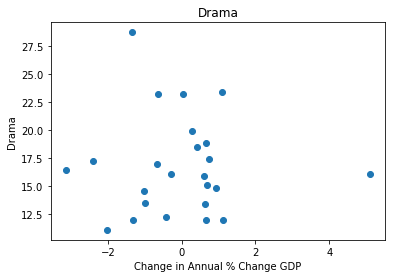

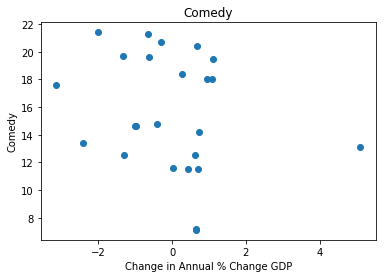

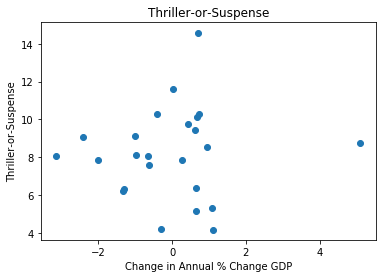

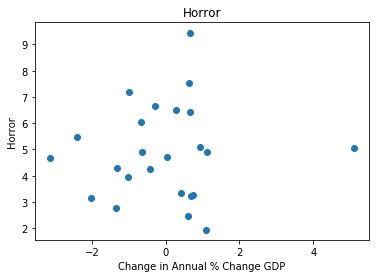

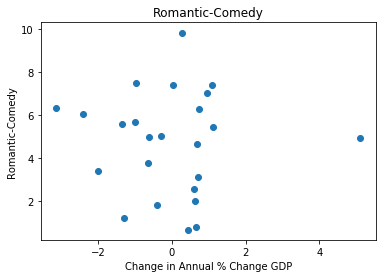

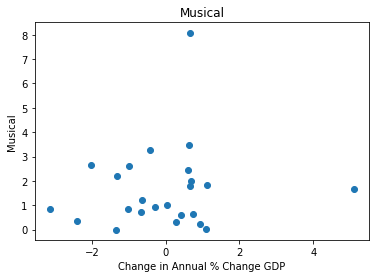

In [226]:
for a in newgenre:
    plt.scatter(final_data[gdptitle], final_data[a + ' Market Share'])
    plt.ylabel(a)
    plt.xlabel(gdptitle)
    plt.title(a)
    plt.show()

** Analysis: ** Through these histograms, we can see some relationship between the economy and movies, but the relationship is not too clear. Specifically, action movies, comedy, thriller and horror all seem to be related in some way, with apparent shifts compared to the economy metrics.

### Line Graph of Ticket Sales and GDP and Income

### Determining Relationship Between Number of Movies Made in a Genre and Number of Tickets Sold

In [16]:
newgenre

['Adventure',
 'Action',
 'Drama',
 'Comedy',
 'Thriller-or-Suspense',
 'Horror',
 'Romantic-Comedy',
 'Musical']

### If no Relationship, Stop looking at Number of Movies Made, If Relationship, Use Covariate and Variate and Determine the Impact to GDP and PCE

### Bar Graph of Min GDP and Max GDP 